# 6. Writing data

There are a number of ways of writing data from pySIMDEUM. This includes saving `House` instances as a pickle object that can be loaded back into pySIMDEUM. Or various methods such as exporting to .csv

## Save to pickle

In [22]:
import pysimdeum
import gzip
import pickle
import matplotlib.pyplot as plt
from pysimdeum.core.house import Property
from pysimdeum.core.statistics import Statistics
import pysimdeum.tools.write as writer

In [23]:
# Build a house (two-person household)
house = pysimdeum.built_house(house_type='one_person', duration ='1 day')

/Users/val.ismaili/DAA/pysimdeum/pysimdeum/core/utils.py:287: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.1667' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  s.iloc[start:end] = intensity
/Users/val.ismaili/DAA/pysimdeum/pysimdeum/core/utils.py:343: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.6723566666666668' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  discharge_pattern.loc[discharge_start:discharge_end - pd.Timedelta(seconds=1)] = discharge_rate # restrict range to not be inclusive of final timstamp as this would result in extra discharge
/Users/val.ismaili/DAA/pysimdeum/pysimdeum/core/utils.py:343: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '

You can save the house object as a python pickle object. You can save many different object types as a pickle that can later be read back into Python easily. In this case, we can write the `House` instance.

In [24]:
# Assuming houses is a list of house objects
with gzip.open('data/house.pkl.gz', 'wb') as f:
    pickle.dump(house, f)

Or if you wanted to generate a list of `House` objects, you could also pickle that.

In [25]:
houses = []
number_of_houses = 2

for _i in range(number_of_houses):
    stats = Statistics()
    prop = Property(statistics=stats)
    house = prop.built_house()
    house.populate_house()
    house.furnish_house()
    for user in house.users:
        user.compute_presence(statistics=stats)
    house.simulate()
    houses.append(house)

houses

/Users/val.ismaili/DAA/pysimdeum/pysimdeum/core/utils.py:287: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.1667' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  s.iloc[start:end] = intensity
/Users/val.ismaili/DAA/pysimdeum/pysimdeum/core/utils.py:343: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.6723566666666668' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  discharge_pattern.loc[discharge_start:discharge_end - pd.Timedelta(seconds=1)] = discharge_rate # restrict range to not be inclusive of final timstamp as this would result in extra discharge
/Users/val.ismaili/DAA/pysimdeum/pysimdeum/core/utils.py:343: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '

[House:
 	id	=	855960ba-d720-48de-8198-d24ff0eefea1
 	type	=	one_person
 	user	=	1
 	appliances	=	['WcNormal', 'Bathtub', 'BathroomTap', 'KitchenTap', 'FancyShower', 'WashingMachine'],
 House:
 	id	=	855960ba-d720-48de-8198-d24ff0eefea1
 	type	=	one_person
 	user	=	1
 	appliances	=	['WcNewSave', 'BathroomTap', 'KitchenTap', 'FancyShower', 'WashingMachine']]

In [26]:
# Assuming houses is a list of house objects
with gzip.open('data/houses.pkl.gz', 'wb') as f:
    pickle.dump(houses, f)

You can read either of these pickle objects back into Python in a similar way and then interact with it in the usual ways you might such as plotting the consumption pattern of a house.

In [27]:
# pickle object can be read back
with gzip.open('data/house.pkl.gz', 'rb') as f:
    house_read = pickle.load(f)

house_read

House:
	id	=	855960ba-d720-48de-8198-d24ff0eefea1
	type	=	one_person
	user	=	1
	appliances	=	['WcNewSave', 'BathroomTap', 'KitchenTap', 'NormalShower', 'WashingMachine']

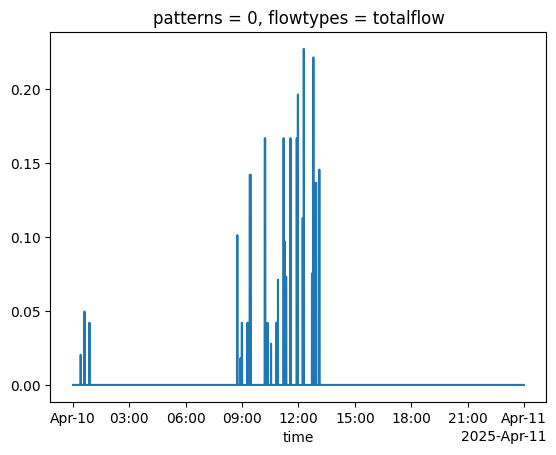

In [28]:
house_read.consumption.sum(["enduse","user"]).sel(flowtypes="totalflow").plot()

## pySIMDEUM write methods

pySIMDEUM includes a number of in-built write methods to provide easy ways to retrieve summary statistics about simulations.

These can be accessed by import functions from the `write` module, as below

```python
import pysimdeum.tools.write as writer
```

A summary of these functions are:
* `writer.export_water_use_distribution`: exports summary of water usage data for appliances in a property or house to an excel files containing two sheets
    * `data`: appliance-level water usage data
    * `metadata`: contains metadata such as total water usage, number of users, and calculation data
* `write_simdeum_patterns_to_ddg`:
* `write_simdeum_patterns_to_xlsx`: exports total water usage patterns to an excel file summated to each timestep level specified by the user for all houses
* `write_simdeum_patterns_to_xlsx`: similar to the above, but specifically for `hotwater` flow

For example, you could write the total flows to an excel file summating to minute (60 second) timesteps. 

**Note that these methods are only currently set up to work for `consumption` simulations**

In [29]:
writer.write_simdeum_patterns_to_xlsx(houses, timestep=60, Q_option='m3/h', patternfile_option=1, output_file='houses.xlsx')